In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/MY PC/Desktop/animal_survay.csv")

In [3]:
df.head()

,Life,Weight,Calories
0,7.0,72.5,1500
1,12.5,200.0,5000
2,2.5,8.5,550
3,7.0,51.5,2000
4,16.5,38.0,3000


## Step 1-> Loading the data

In [4]:
a=np.array(df["Weight"]).reshape(-1,1)

In [5]:
b=np.array(df["Calories"]).reshape(-1,1)

In [6]:
X_train=np.hstack((a,b))

In [7]:
Y_train=np.array(df["Life"])

In [8]:
print("value in x: \n",X_train[:5,])

value in x: 
 [[  72.5 1500. ]
 [ 200.  5000. ]
 [   8.5  550. ]
 [  51.5 2000. ]
 [  38.  3000. ]]


In [9]:
print("value of y: \n",Y_train[0:5])

value of y: 
 [ 7.  12.5  2.5  7.  16.5]


In [10]:
# def cal(x1,x2):
#     x=np.array([x1,x2,x1**2,x2**2,x1**3,x2**3])
#     return x

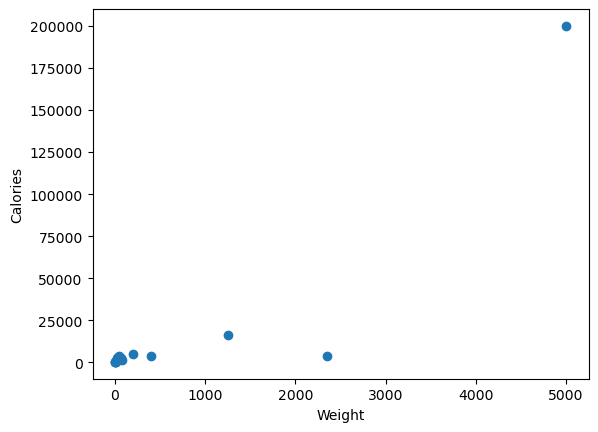

In [11]:
plt.scatter(a,b)
plt.xlabel("Weight")
plt.ylabel("Calories")
plt.show()

In [12]:
correlation = df.corr()

<Axes: >

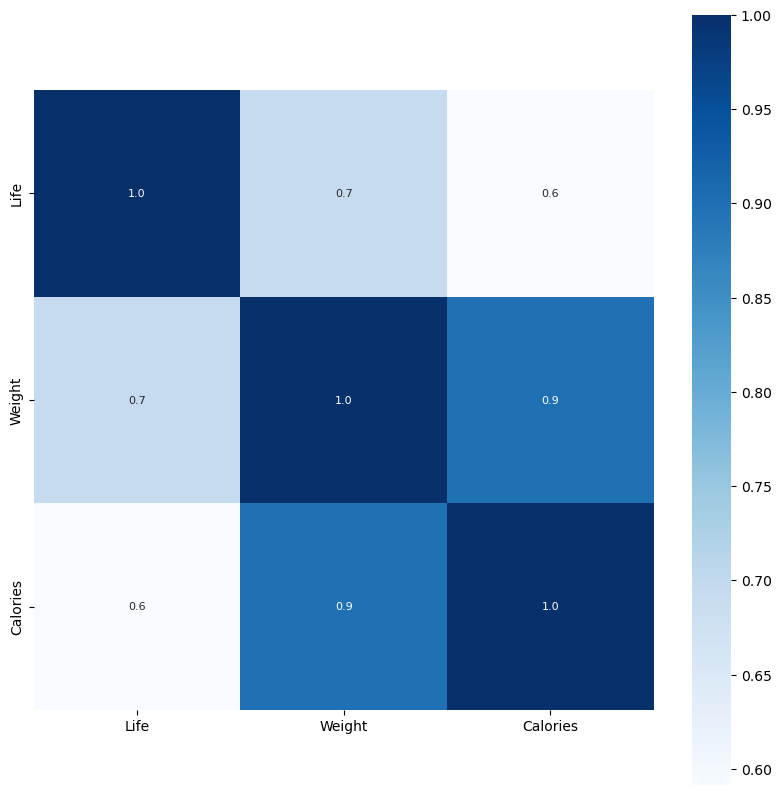

In [13]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [14]:
# X=X_train
# X_train4=None
# for i in range(X.shape[0]):
#     if  X_train4 is None:
#         X_train4=cal(X[i][0],X[i][1])
#     else:
#         X_train4=np.vstack([X_train4,cal(X[i][0],X[i][1])])
    
# print(X_train4)

## Step 2-> Calculating cost function

In [16]:
def calc_cost(x,y,w,b):
    m=x.shape[0];
    cost=0
    for i in range(m):
        f_dw=np.dot(x[i],w)+b
        cost+=(f_dw-y[i])**2
        
    cost=cost/(2*m)
    return cost

In [17]:
def calc_grad(x,y,w,b):
    m,n=x.shape
    
    dj_dw=np.zeros(n);
    dj_db=0;
    
    for i in range(m):
        f_wb=(np.dot(x[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j]+=f_wb*x[i,j]
        dj_db+=f_wb
        
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [18]:
def grad_desc(x,y,w,b,alpha,iteri):

    w_in=w
    b_in=b
    j_hist=[]
    for i in range(iteri):
        dj_dw,dj_db=calc_grad(x,y,w_in,b_in)
        
        w_in=w_in - alpha*dj_dw
        b_in=b_in - alpha*dj_db
        
        if i<100000:
            j_hist.append(calc_cost(x,y,w_in,b_in))
            
        if i% math.ceil(iteri / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_hist[-1]:8.2f}   ")
            
    return w_in,b_in,j_hist

In [19]:
w=np.zeros(X_train.shape[1])
b=0

alpha=0.0000000007
iteri=100000

w,b,j_hist=grad_desc(X_train,Y_train,w,b,alpha,iteri)

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w) + b:0.2f}, target value: {Y_train[i]}")

Iteration    0: Cost   292.44   
Iteration 10000: Cost   177.59   
Iteration 20000: Cost   176.86   
Iteration 30000: Cost   176.85   
Iteration 40000: Cost   176.85   
Iteration 50000: Cost   176.85   
Iteration 60000: Cost   176.85   
Iteration 70000: Cost   176.85   
Iteration 80000: Cost   176.85   
Iteration 90000: Cost   176.85   
prediction: 1.24, target value: 7.0
prediction: 3.25, target value: 12.5
prediction: 0.08, target value: 2.5
prediction: 0.71, target value: 7.0
prediction: 0.25, target value: 16.5
prediction: -0.00, target value: 3.5
prediction: 67.70, target value: 65.0
prediction: -0.03, target value: 9.0
prediction: 23.11, target value: 25.0
prediction: 0.13, target value: 12.5
prediction: 7.69, target value: 30.0
prediction: 0.90, target value: 50.0
prediction: 0.25, target value: 11.0
prediction: -0.01, target value: 12.5
prediction: 48.19, target value: 45.0
prediction: 0.55, target value: 50.0
prediction: 0.04, target value: 6.5
prediction: -0.00, target value: